In [2]:
import warnings
warnings.filterwarnings("ignore")

import mp1 as mp1
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from PIL import Image



In [55]:
def saveCSV(img,filename):
    img.tofile(f"{filename}.csv", sep = ',')

# Boat

(200, 192)


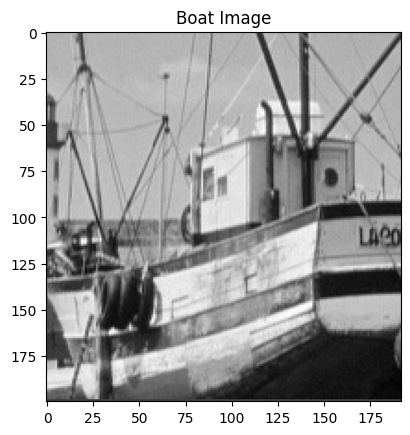

In [50]:
boat = np.asarray(Image.open('fishing_boat.bmp'), dtype=np.float64)
print(boat.shape)
fig,ax = plt.subplots()
ax.imshow(boat, cmap='gray')
ax.set_title("Boat Image")
plt.show()

# Nature

(512, 640)


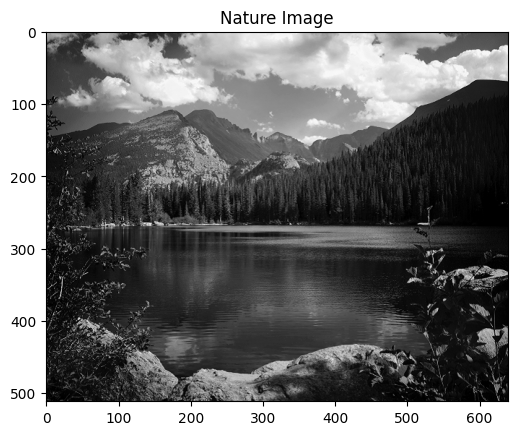

In [24]:
nature = np.asarray(Image.open('nature.bmp'), dtype=np.float64)
print(nature.shape)
fig,ax = plt.subplots()
ax.imshow(nature, cmap='gray')
ax.set_title("Nature Image")
plt.show()

# Field Test

(256, 384)


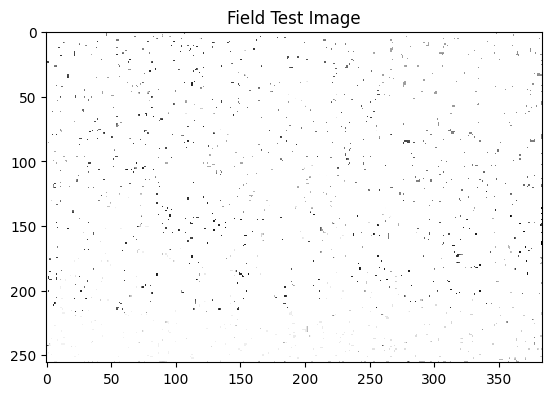

In [8]:
fieldtest = np.loadtxt('field_test_image.txt',delimiter=',')
print(fieldtest.shape)
fig,ax = plt.subplots()
ax.imshow(fieldtest, cmap='gray')
ax.set_title("Field Test Image")
plt.show()

nonnan = fieldtest[~np.isnan(fieldtest)]

In [9]:
print(nonnan.shape, fieldtest.shape[0] * fieldtest.shape[1])

for k in [8, 12, 16, 20]:
    approxS = (k**2) * nonnan.shape[0] // (fieldtest.shape[0] * fieldtest.shape[1])
    print(approxS)
    approxM = approxS//6
    print(approxM)
    
    # _, lambdas = reconstruct_img(fieldtest,approxM, k)
    # nparray = np.array(lambdas)
    # saveCSV(nparray, f"lambdas field_test k_{k}")
    
    # fig,ax = plt.subplots()
    # ax.imshow(reconstructed_img, cmap='gray')
    # ax.set_title("reconstructed image")
    # plt.show()

# reconstructed_img_medfilt = signal.medfilt2d(reconstructed_img, kernel_size=3)
# fig,ax = plt.subplots()
# ax.imshow(reconstructed_img_medfilt, cmap='gray')
# ax.set_title("reconstructed image with median filter")
# plt.show()

(34406,) 98304
22
3
50
8
89
14
139
23


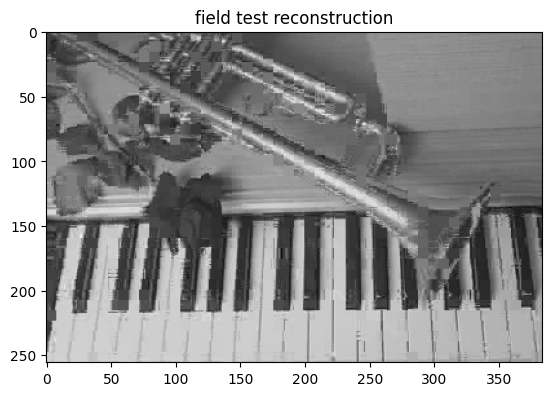

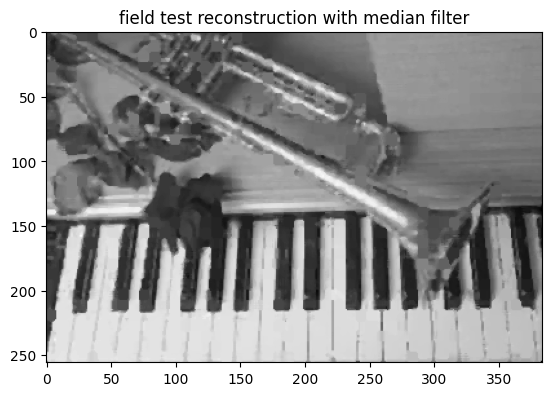

In [5]:
img = np.loadtxt('fieldtest_k8.csv',delimiter=',',dtype=np.float64)
fig,ax = plt.subplots()
ax.imshow(img, cmap='gray')
ax.set_title(f"field test reconstruction")
plt.show()

fig,ax = plt.subplots()
ax.imshow(addMedianFilter(None, img, 3), cmap='gray')
ax.set_title(f"field test reconstruction with median filter")
plt.show()

In [ ]:
def runReconstructionSimulations(img, sValues, k, filePrefix, plot=False):
    d = {}
    for s in sValues:
        reconstructed_img = mp1.simulate_reconstruct_img(img, s, k, plot=plot)
        saveCSV(reconstructed_img, f"{filePrefix}_{s}")
        d[s] = reconstructed_img
    return d

boatReconstructions = runReconstructionSimulations(boat, [10,20,30,40,50], 8, "boat_k8_s_")

natureReconstructions = runReconstructionSimulations(nature, [100, 10, 30, 50, 150], 16, "nature_k16_s_")

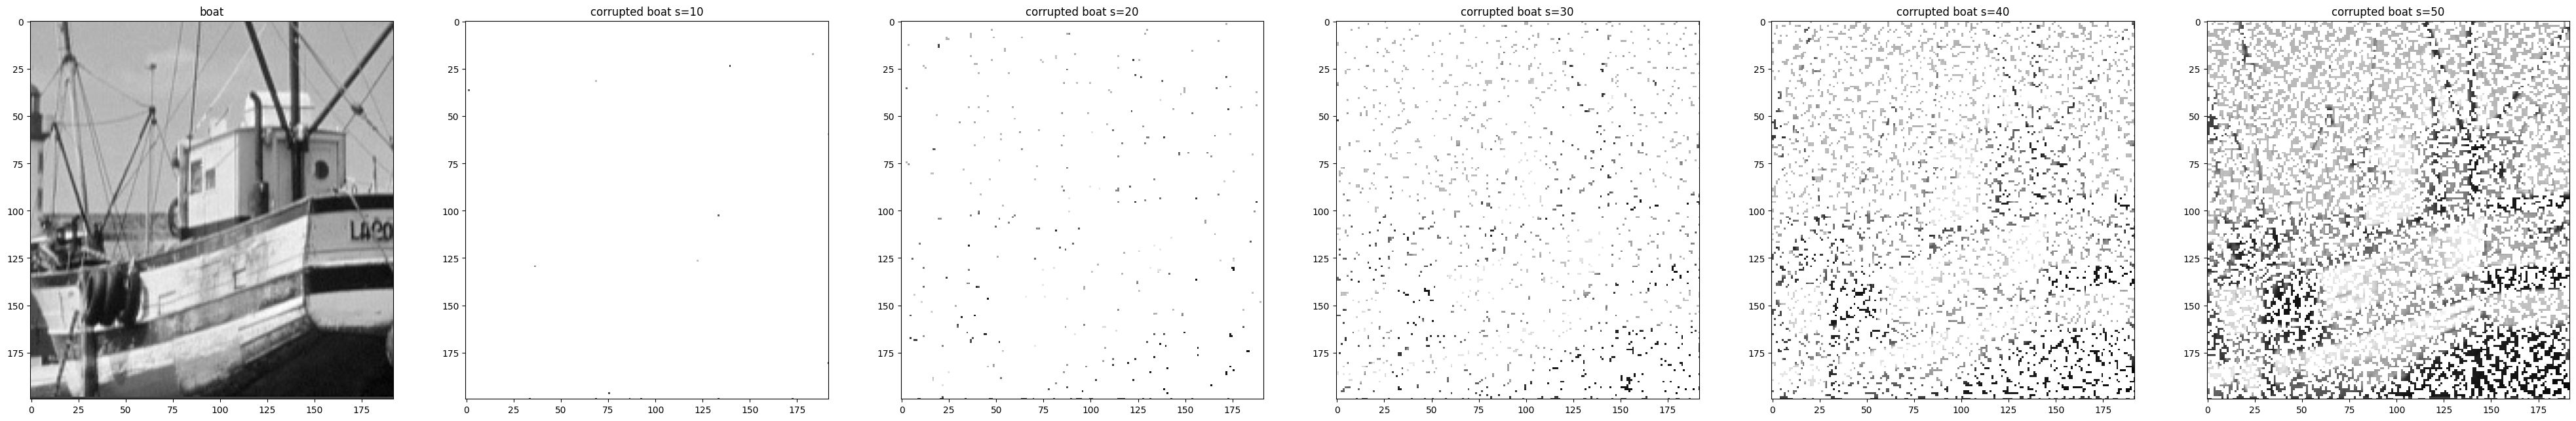

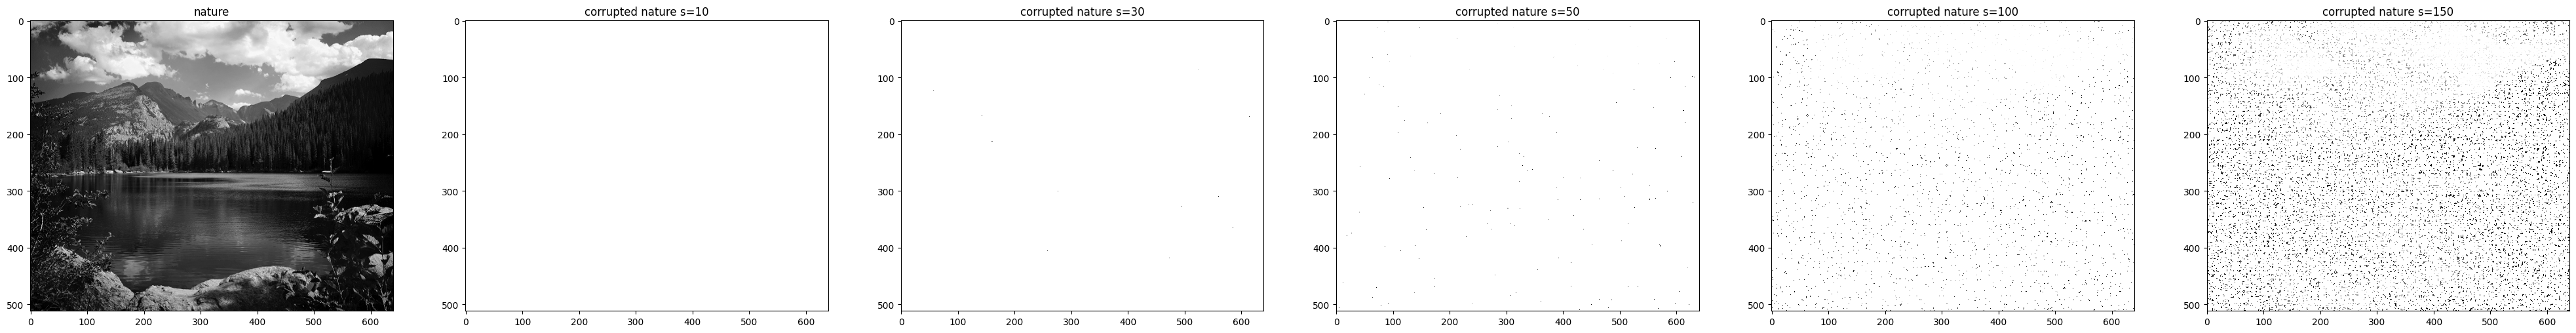

In [77]:
# fig 1
def showCorruptImage(img, sValues, k, title):
    fig, ax = plt.subplots(1,6,figsize=(50,15))
    ax[0].imshow(img, cmap='gray')
    ax[0].set_title(f"{title}")
    for i in range(len(sValues)):
        corrupted_img = corruptImg(img, sValues[i], k, plot=False)
        ax[i+1].imshow(corrupted_img, cmap='gray')
        ax[i+1].set_title(f"corrupted {title} s={sValues[i]}")
    plt.show()



boatChips = showCorruptImage(boat, [10,20,30,40,50], 8, "boat")
natureChips = showCorruptImage(nature, [10, 30, 50, 100, 150], 16, "nature")

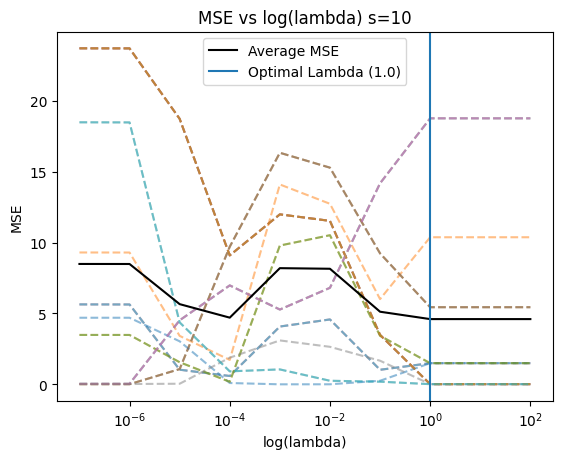

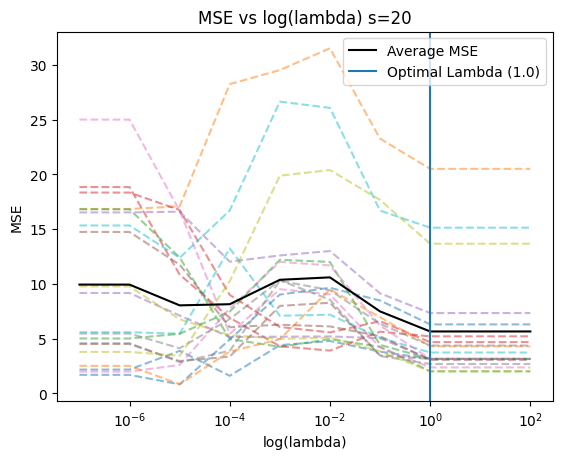

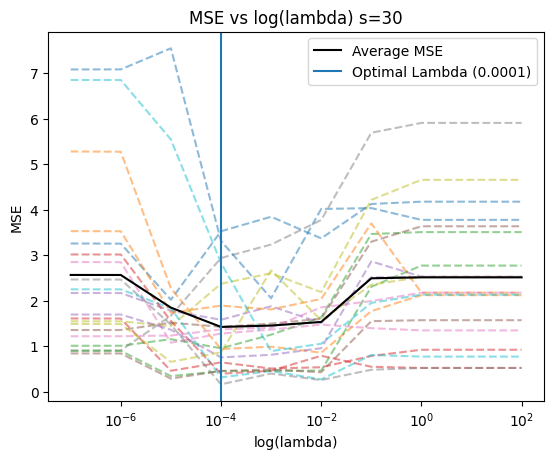

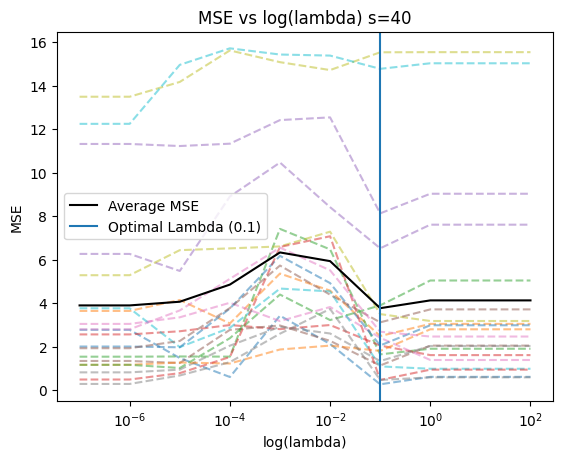

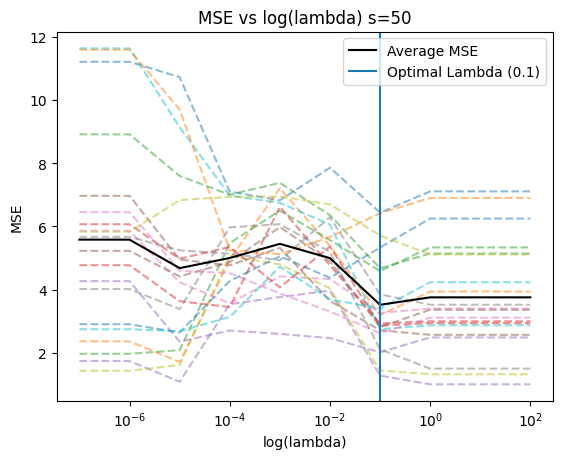

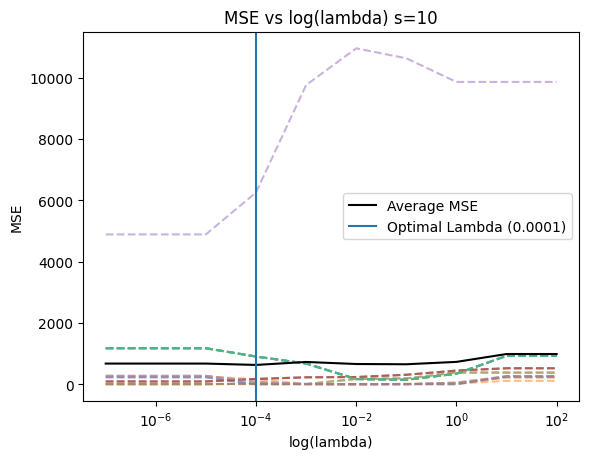

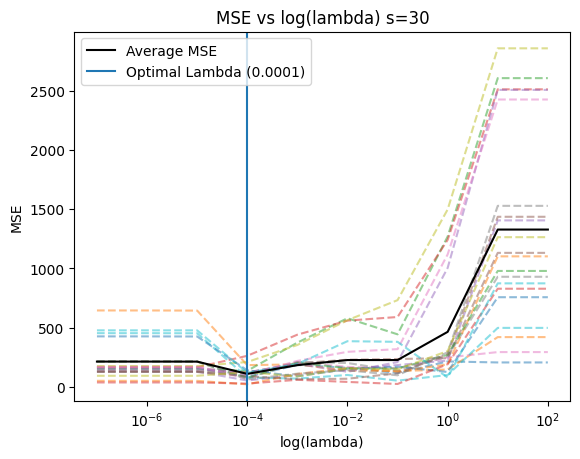

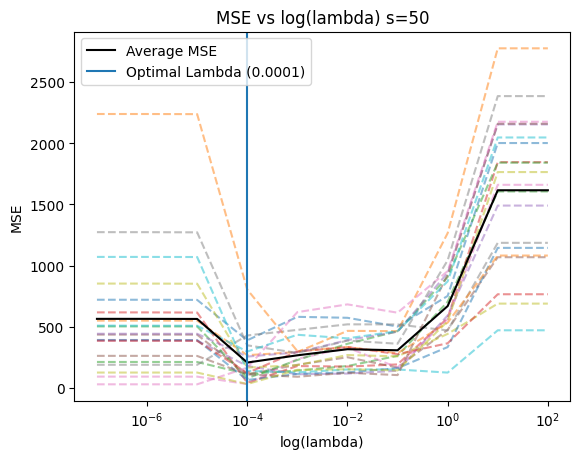

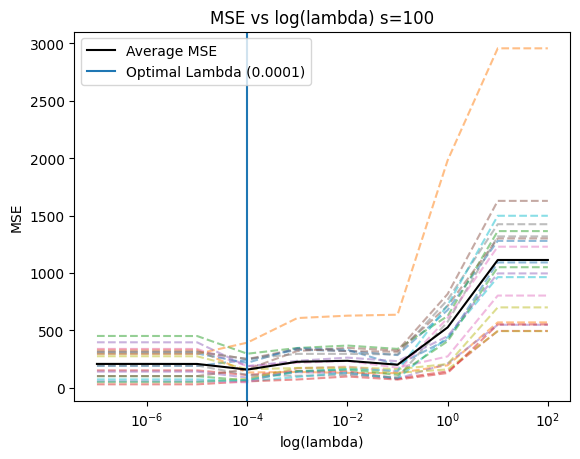

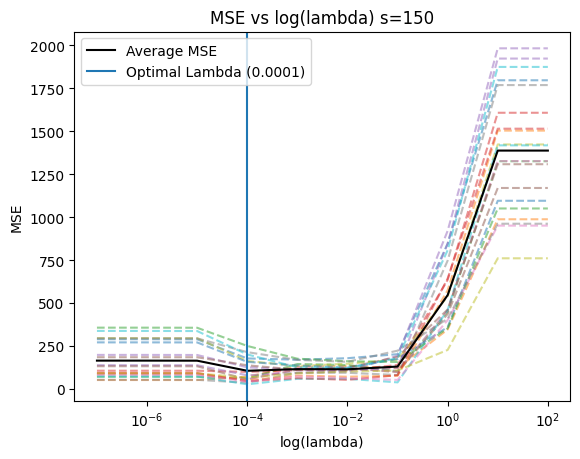

In [106]:
# fig 2 and mse vs lambda for chip
def runChipSim(img, sValues, k):
    for s in sValues:
        original_chip = img[0:k,0:k]
        corrupted_chip = createSnChip(original_chip, s, k)
        basisVectorMatrix = getBasisVectorMatrix(k, k)
        reconstructed_chip, optimal_lambda = reconstruct_chip(basisVectorMatrix, corrupted_chip, s//6, plot=True)
        
        # fig,ax = plt.subplots(1,3,figsize=(15,15))
        
        # ax[0].imshow(original_chip, cmap='gray')
        # ax[0].set_title(f"original chip s={s}")

        # ax[1].imshow(corrupted_chip, cmap='gray')
        # ax[1].set_title(f"corrupted chip s={s}")

        # ax[2].imshow(reconstructed_chip, cmap='gray')
        # ax[2].set_title(f"reconstructed chip s={s}")
        # plt.show()



boatChips = runChipSim(boat, [10,20,30,40,50], 8)
natureChips = runChipSim(nature, [10, 30, 50, 100, 150], 16)


In [ ]:
# fig 3 
boat = np.asarray(Image.open('fishing_boat.bmp'), dtype=np.float64)
nature = np.asarray(Image.open('nature.bmp'), dtype=np.float64)

def plot(original, reconstructed_img, title):
    mse = np.mean((original-reconstructed_img)**2)
    reconstructed_img_median = addMedianFilter(original, reconstructed_img, 3)
    mse_median = np.mean((original-reconstructed_img_median)**2)

    fig,ax = plt.subplots(1,3,figsize=(15,15))
    ax[0].imshow(original, cmap='gray')
    ax[0].set_title("Original Image")
    ax[1].imshow(reconstructed_img, cmap='gray')
    ax[1].set_title(f"{title} \nmse:{round(mse,5)}")
    ax[2].imshow(reconstructed_img_median, cmap='gray')
    ax[2].set_title(f"{title} \nwith median filter \nmse:{round(mse_median,5)}")
    plt.show()

for s in [10,20,30,40,50]:
    reconstructed_imgimg = np.loadtxt(f'boat_k8_s__{s}.csv',delimiter=',',dtype=np.float64).reshape(boat.shape[0],boat.shape[1])
    plot(boat, reconstructed_imgimg, f"boat k=8 s={s}")

for s in [10, 30, 50, 100, 150]:
    reconstructed_imgimg = np.loadtxt(f'nature_k16_s__{s}.csv',delimiter=',',dtype=np.float64).reshape(nature.shape[0],nature.shape[1])
    plot(nature, reconstructed_imgimg, f"nature k=16 s={s}")
    


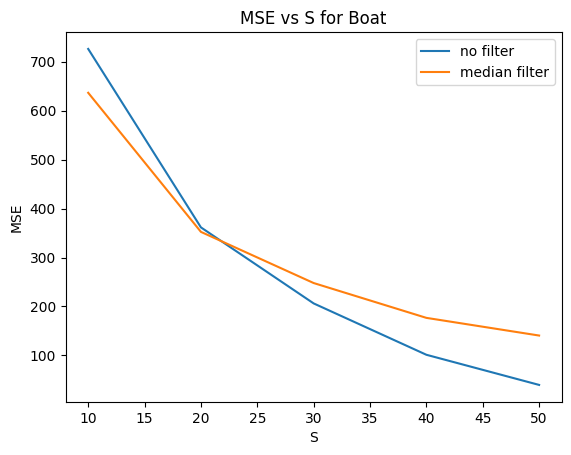

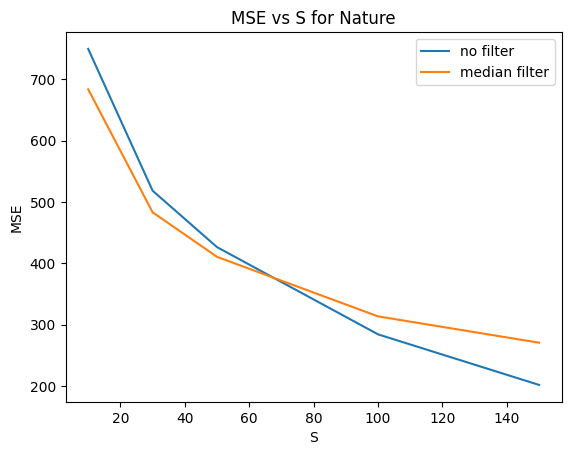

In [84]:
# mse vs S 

def mseVs(original, sVals, title):
    mse = []
    mse_medfilt = []

    for s in sVals:
        reconstructed_img = np.loadtxt(f'{title}_s__{s}.csv',delimiter=',',dtype=np.float64).reshape(original.shape[0],original.shape[1])
        medfilt_reconstructed_img = addMedianFilter(original, reconstructed_img, 3)
        mse.append(np.mean((original-reconstructed_img)**2))
        mse_medfilt.append(np.mean((original-medfilt_reconstructed_img)**2))
    fig, ax = plt.subplots()
    ax.plot(sVals, mse, label="no filter")
    ax.plot(sVals, mse_medfilt, label="median filter")
    ax.set_xlabel("S")
    ax.set_ylabel("MSE")
    ax.set_title(f"MSE vs S for {title}")
    ax.legend()
    plt.show()

s_boat = [10,20,30,40,50]

s_nature = [10, 30, 50, 100, 150]
mseVs(boat, s_boat, "boat_k8")
mseVs(nature, s_nature, "nature_k16")

In [60]:
# fig 4
def regularizationFigure(img, sValues, k, title):
    
    for s in sValues:
        print(s)
        corrupted_img = corruptImg(img, s, k, plot=False)
        _, lambdas = reconstruct_img(corrupted_img, s//6, k)
        nparray = np.array(lambdas)
        saveCSV(nparray, f"lambdas {title} s_{s}")
        

regularizationFigure(boat, [10,20,30,40,50], 8, "boat")
regularizationFigure(nature, [10, 30, 50, 100, 150], 16, "nature")

10
20
30
40
50
10
30
50
100
150


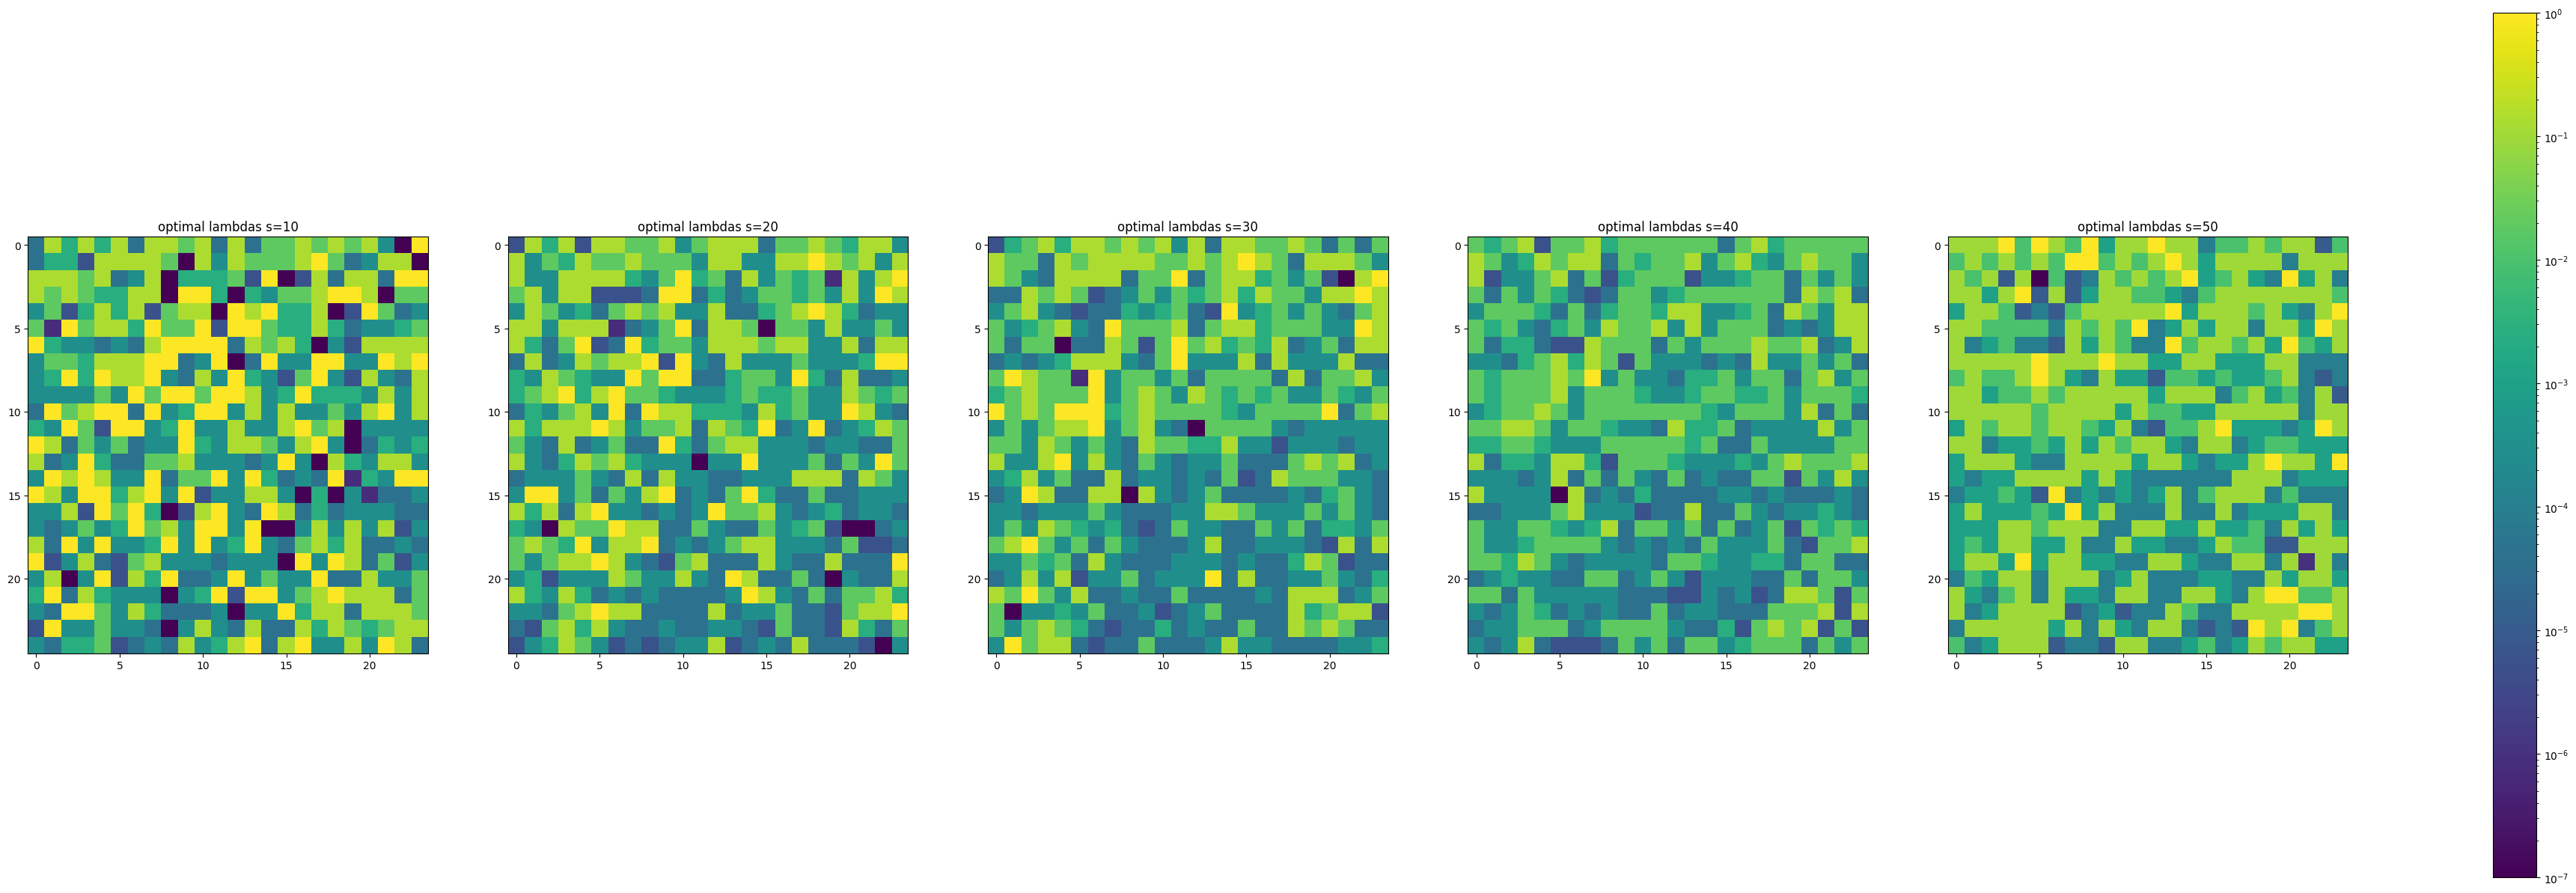

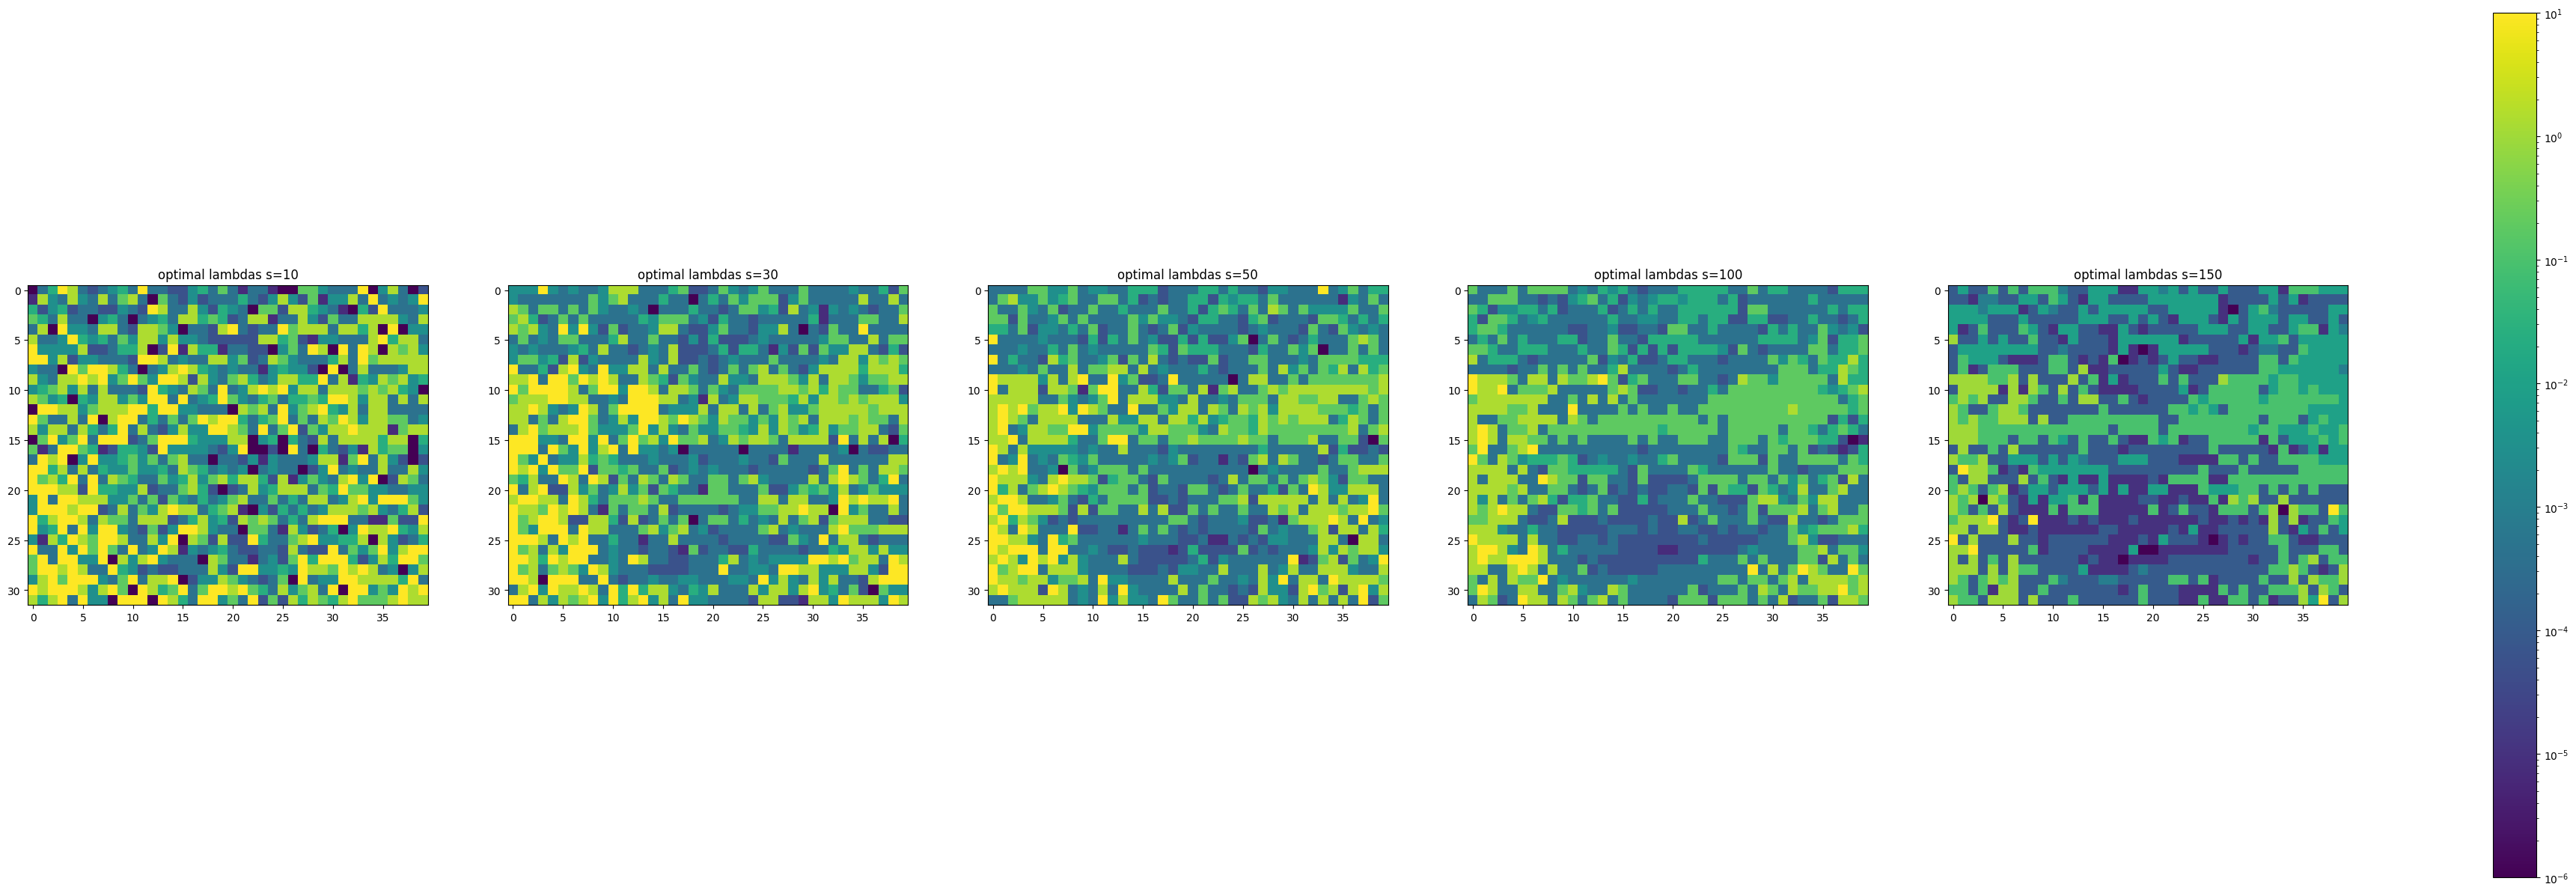

In [102]:
from matplotlib.colors import LogNorm


def plotlambdas(original, sValues, name, k):
    fig,ax = plt.subplots(1,5,figsize=(50,15))

    for i, s in enumerate(sValues):
        img_lambda = np.loadtxt(f'lambdas {name} s_{s}.csv',delimiter=',',dtype=np.float64).reshape(original.shape[0]//k, original.shape[1]//k)
        c = ax[i].imshow(img_lambda, norm=LogNorm(vmin=img_lambda.min(), vmax=img_lambda.max()))
        ax[i].set_title(f"optimal lambdas s={s}")
    fig.colorbar(c, ax=ax.ravel().tolist())

s_boat = [10,20,30,40,50]
plotlambdas(boat,s_boat, 'boat', 8)
s_nature = [10, 30, 50, 100, 150]
plotlambdas(nature,s_nature, 'nature', 16)


    

In [13]:
boat = np.asarray(Image.open('fishing_boat.bmp'), dtype=np.float64)

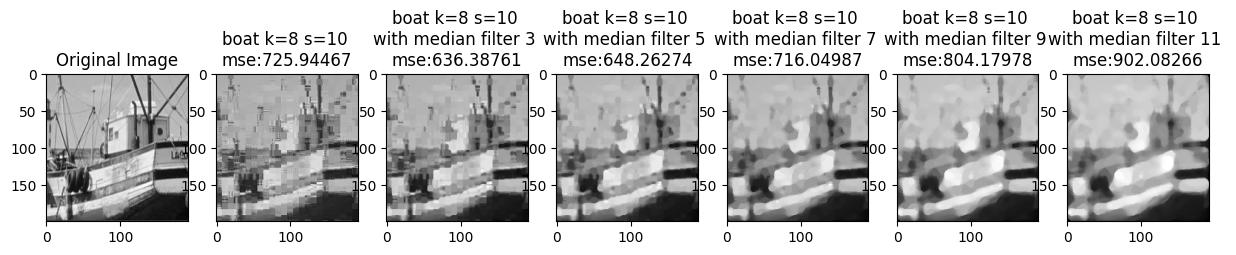

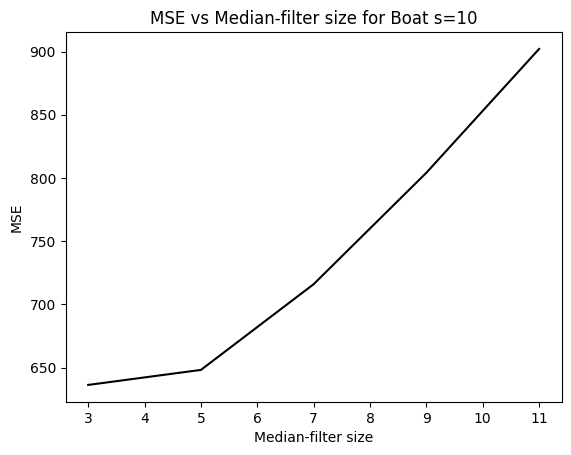

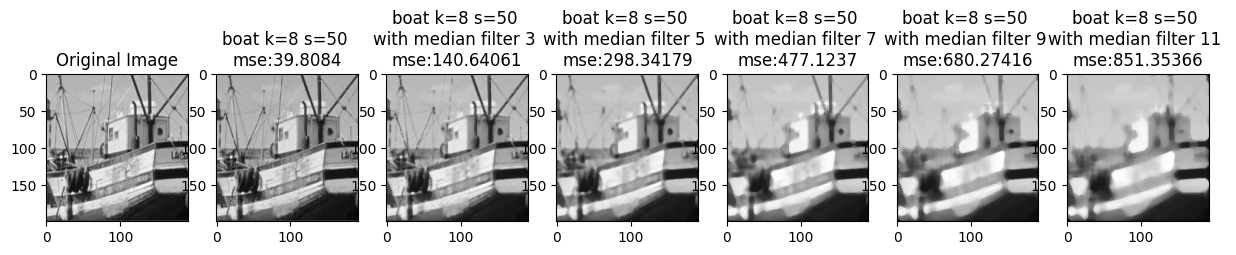

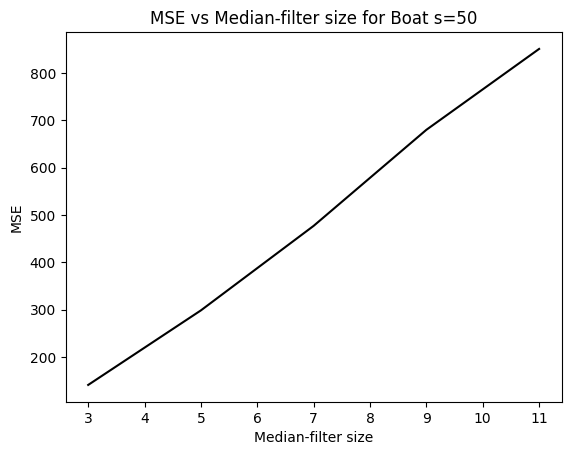

In [14]:
def plotMSE_filtSize(original, reconstructed_img, title):
    mse = np.mean((original-reconstructed_img)**2)
    fig,ax = plt.subplots(1,7,figsize=(15,15))
    ax[0].imshow(original, cmap='gray')
    ax[0].set_title("Original Image")
    ax[1].imshow(reconstructed_img, cmap='gray')
    ax[1].set_title(f"{title} \nmse:{round(mse,5)}")
    
    mses = []
    for i, filtsize in enumerate([3,5,7,9,11]):
        reconstructed_img_median = addMedianFilter(original, reconstructed_img, filtsize)
        mse_median = np.mean((original-reconstructed_img_median)**2)
        mses.append(mse_median)
        ax[i+2].imshow(reconstructed_img_median, cmap='gray')

        ax[i+2].set_title(f"{title} \nwith median filter {filtsize} \nmse:{round(mse_median,5)}")
    plt.show()
    return mses

# for s in [10,20,30,40,50]:
for s in [10,50]:

    reconstructed_imgimg = np.loadtxt(f'boat_k8_s__{s}.csv',delimiter=',',dtype=np.float64).reshape(boat.shape[0],boat.shape[1])
    mses = plotMSE_filtSize(boat, reconstructed_imgimg, f"boat k=8 s={s}")
    fig, ax = plt.subplots()
    ax.set_title(f"MSE vs Median-filter size for Boat s={s}")
    ax.set_xlabel("Median-filter size")
    ax.set_ylabel("MSE")
    ax.plot([3,5,7,9,11], mses,c="black",label="Average MSE")

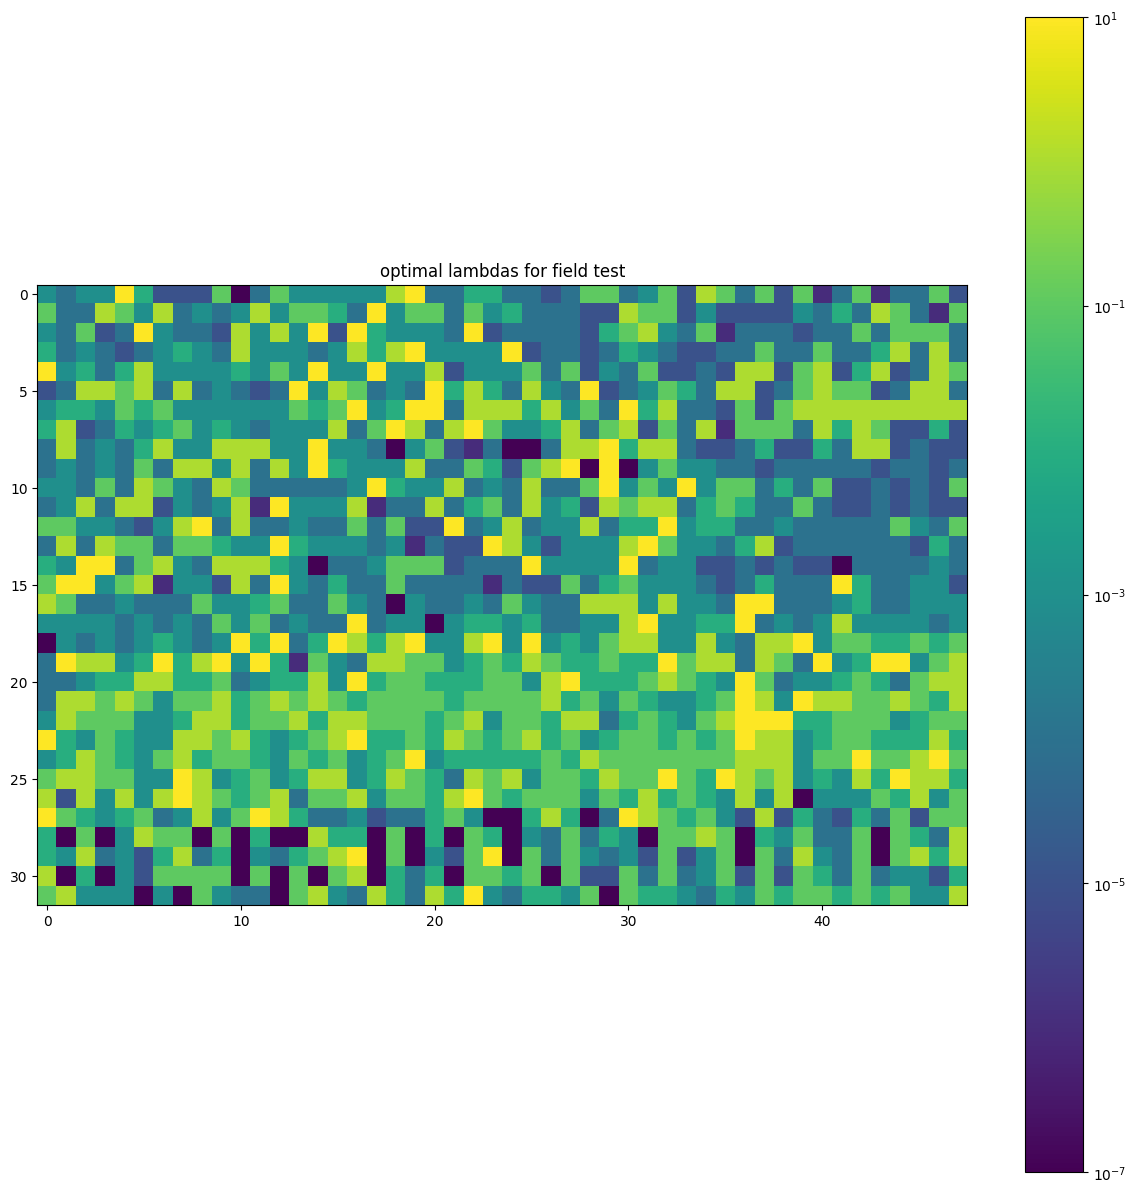

In [11]:
from matplotlib.colors import LogNorm


def plotlambdas(original, k=8):
    fig,ax = plt.subplots(figsize=(15,15))

    img_lambda = np.loadtxt(f'lambdas field_test k_8.csv',delimiter=',',dtype=np.float64).reshape(original.shape[0]//k, original.shape[1]//k)
    c = ax.imshow(img_lambda, norm=LogNorm(vmin=img_lambda.min(), vmax=img_lambda.max()))
    ax.set_title(f"optimal lambdas for field test")
    fig.colorbar(c)

fieldtest = np.loadtxt('field_test_image.txt',delimiter=',')

plotlambdas(fieldtest)



    